In [1]:
# import the required libraries
import pandas as pd
import ydata_profiling as pdpf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("db_cleaned_dropped_unneccesary.csv")

### MODELING

In [3]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
import time

model_performance = pd.DataFrame(columns=['Accuracy', 'Precision',
                                          'Recall', 'F1-Score', 'Training time',
                                          'Prediction time'])

def log_scores(model_name, y_test, y_predictions):
    accuracy = accuracy_score(y_test, y_predictions)
    precision = precision_score(y_test, y_predictions, average='weighted')
    recall = recall_score(y_test, y_predictions, average='weighted')
    precision = precision_score(y_test, y_predictions, average='weighted')
    f1 = f1_score(y_test, y_predictions, average='weighted')

    # save the scores in model_performance dataframe
    model_performance.loc[model_name] = [accuracy, precision, recall, f1,
                                       end_train-start, end_predict-end_train]

### Data splitting and sampling

In [4]:
df.columns

Index(['Type', 'Process temperature', 'Rotational speed', 'Torque',
       'Tool wear', 'Machine failure', 'Power', 'temperature_differential',
       'power_speed_ratio', 'thermal_stress', 'operational_stress',
       'efficiency_index', 'power_wear_interaction',
       'speed_torque_efficiency'],
      dtype='object')

In [41]:
df.describe()

,Type,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,Power,temperature_differential,power_speed_ratio,thermal_stress,operational_stress,efficiency_index,power_wear_interaction,speed_torque_efficiency
count,8353.000000,8.353000e+03,8.353000e+03,8.353000e+03,8.353000e+03,8353.000000,8.353000e+03,8.353000e+03,8.353000e+03,8.353000e+03,8.353000e+03,8.353000e+03,8.353000e+03,8.353000e+03
mean,0.501736,3.062318e-17,-1.148369e-17,3.593970e-17,9.569742e-18,0.019753,2.381803e-17,-5.018798e-17,2.126609e-18,-1.786352e-17,3.317511e-17,-2.323321e-17,-4.306384e-17,1.999013e-17
std,0.672765,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,0.139160,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00
min,0.000000,-2.918856e+00,-2.155044e+00,-1.978265e+00,-1.739094e+00,0.000000,-2.159318e+00,-2.409576e+00,-1.978350e+00,-2.623263e+00,-1.642949e+00,-2.779986e+00,-1.691759e+00,-1.699169e+00
25%,0.000000,-8.164902e-01,-7.528073e-01,-7.772153e-01,-8.628516e-01,0.000000,-7.708699e-01,-7.059628e-01,-7.773524e-01,-7.304229e-01,-8.353283e-01,-7.107120e-01,-8.423770e-01,-7.871557e-01
50%,0.000000,6.514709e-02,-1.085362e-01,-2.149853e-02,-2.836225e-03,0.000000,-5.713262e-02,-2.049001e-01,-2.161227e-02,-5.852691e-02,-5.720338e-02,6.865408e-02,-3.307273e-02,-1.861959e-01
75%,1.000000,6.755113e-01,6.778534e-01,7.477132e-01,8.571791e-01,0.000000,7.328930e-01,9.976506e-01,7.477495e-01,6.767309e-01,7.340390e-01,7.814212e-01,7.916109e-01,6.438913e-01
max,2.000000,2.574422e+00,2.790683e+00,2.610015e+00,2.285129e+00,1.000000,3.061920e+00,2.099989e+00,2.610081e+00,3.000045e+00,2.698503e+00,2.285950e+00,2.710698e+00,2.807011e+00


70-30 dataset split (train, test)

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(["Machine failure"], axis=1)
y = df["Machine failure"]

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, 
                                                    random_state = 0,
                                                    stratify = y)

oversampling training set to overcome data imbalance

In [7]:
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import RandomOverSampler

oversample = SVMSMOTE(random_state = 42)
#oversample = RandomOverSampler(random_state=42)

X_train, y_train = oversample.fit_resample(X_train, y_train)

training set after oversampling

(array([5732.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5732.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

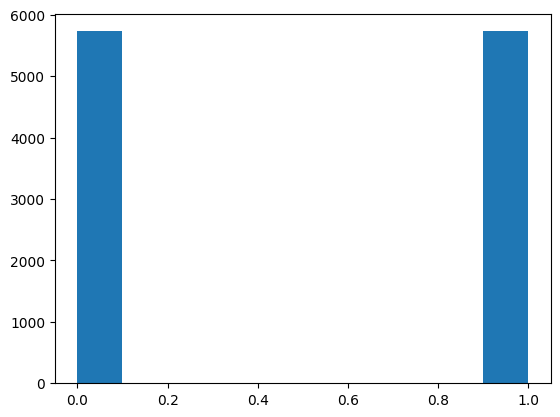

In [8]:
plt.hist(y_train)

### Decision Tree Model

In [9]:
from sklearn.tree import DecisionTreeClassifier

start = time.time()
model = DecisionTreeClassifier(max_depth = 8).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Decision Tree", y_test, y_predictions)

Model evaluation:

- 0: No failure
- 1: Machine failure

In [10]:
print("Decision Tree\n" + classification_report(y_test, y_predictions))

Decision Tree
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2456
         1.0       0.55      0.72      0.63        50

    accuracy                           0.98      2506
   macro avg       0.77      0.85      0.81      2506
weighted avg       0.99      0.98      0.98      2506



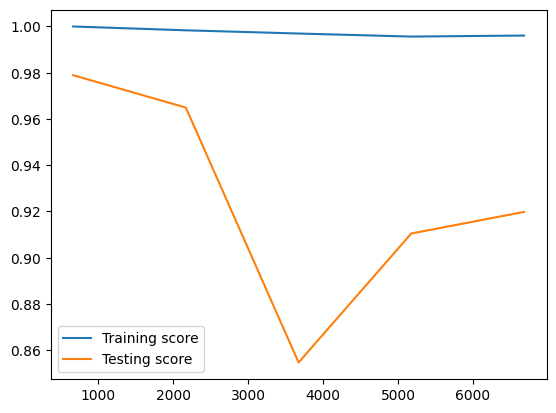

In [11]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

confusion matrix of decision tree model

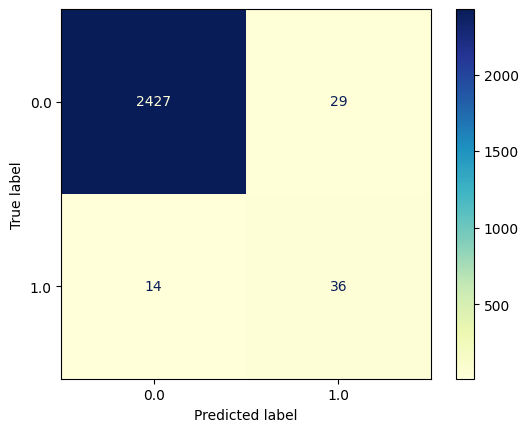

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

Graph

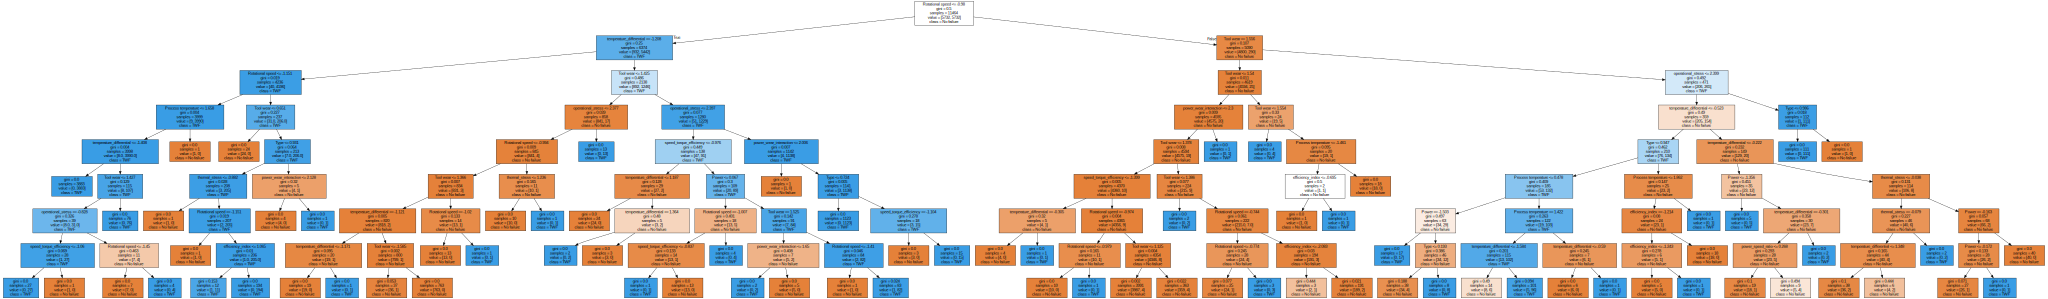

In [13]:
import graphviz
from sklearn import tree

data = tree.export_graphviz(model,
                            feature_names=X.columns,  
                            class_names=['No failure','TWF','HDF','PWF','OSF','RNF'],
                            filled=True)

# draw graph
graph = graphviz.Source(data, format="png") 
graph.render('nodes', view=False)
graph

In [14]:
from sklearn.tree import export_text

rules = export_text(model)

# print the rules
print(rules)

|--- feature_2 <= -0.98
|   |--- feature_6 <= -1.21
|   |   |--- feature_2 <= -1.15
|   |   |   |--- feature_1 <= 1.66
|   |   |   |   |--- feature_6 <= -1.41
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_6 >  -1.41
|   |   |   |   |   |--- feature_4 <= 1.43
|   |   |   |   |   |   |--- feature_9 <= -0.83
|   |   |   |   |   |   |   |--- feature_12 <= -1.06
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- feature_12 >  -1.06
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- feature_9 >  -0.83
|   |   |   |   |   |   |   |--- feature_2 <= -1.45
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- feature_2 >  -1.45
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- feature_4 >  1.43
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |--- feature_1 >  1.66
|   |   |   |   |--- class: 0.0
|   |   |--- feature_2 >  -1.15
|   |   |   |--- feature_4 <= 0.65
|   |  

### k-NN (K-nearest neighbours) model

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# create the model
knn = KNeighborsClassifier()

# define the parameter grid
param_grid = {'n_neighbors': range(2, 20)}

# create the grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# print the best parameters
print(grid_search.best_params_)

{'n_neighbors': 2}


In [16]:
start = time.time()
model = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # predictions from the testset
end_predict = time.time()

# evaluate the model
log_scores("k-NN", y_test, y_predictions)

Model evaluation:

- 0: No failure
- 1: Machine failure

In [17]:
print("k-NN Model\n" + classification_report(y_test, y_predictions))

k-NN Model
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2456
         1.0       0.44      0.48      0.46        50

    accuracy                           0.98      2506
   macro avg       0.72      0.73      0.73      2506
weighted avg       0.98      0.98      0.98      2506



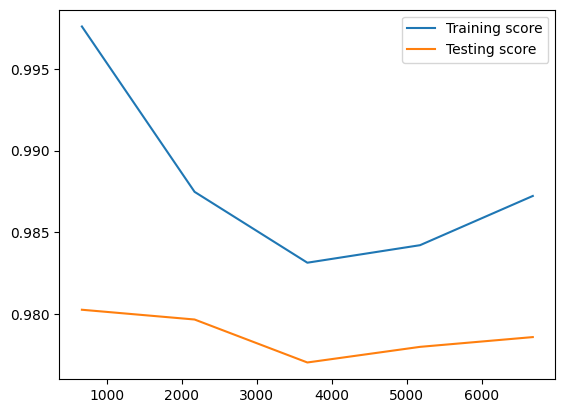

In [18]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

confusion matrix

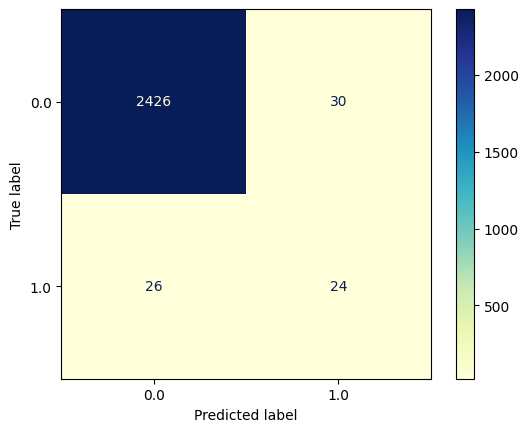

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

### Random forest Model

In [20]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()
model = RandomForestClassifier(n_estimators=100, n_jobs=-1,
                               random_state=0, bootstrap=True).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Random Forest", y_test, y_predictions)

Model evaluation:

- 0: No failure
- 1: Machine failure

In [21]:
print("Random Forest Model\n" + classification_report(y_test, y_predictions))

Random Forest Model
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2456
         1.0       0.76      0.70      0.73        50

    accuracy                           0.99      2506
   macro avg       0.88      0.85      0.86      2506
weighted avg       0.99      0.99      0.99      2506



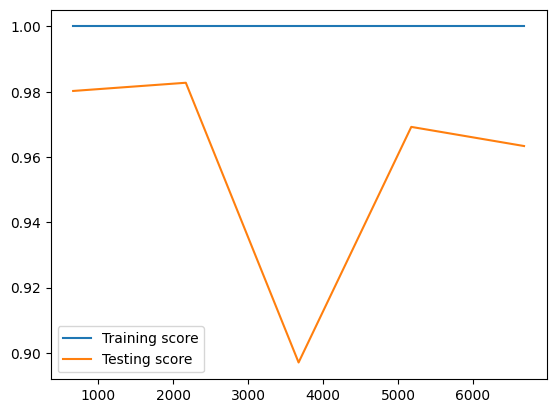

In [22]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

confusion matrix of Random Forest model

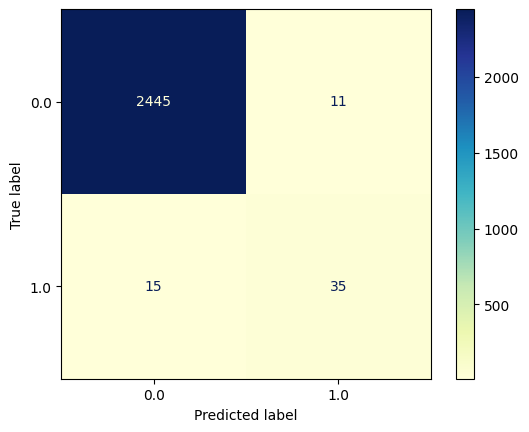

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

### Gradient Boosting Model

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

start = time.time()
model = GradientBoostingClassifier().fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Gradient Boosting", y_test, y_predictions)

Model evaluation:

- 0: No failure
- 1: Machine failure

In [25]:
print("Gradient Boosting\n" + classification_report(y_test, y_predictions))

Gradient Boosting
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2456
         1.0       0.55      0.74      0.63        50

    accuracy                           0.98      2506
   macro avg       0.77      0.86      0.81      2506
weighted avg       0.99      0.98      0.98      2506



/home/ubuntu/dev/Stats_analysis/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ubuntu/dev/Stats_analysis/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ubuntu/dev/Stats_analysis/.venv/lib/python3.10/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/ubuntu/dev/Stats_analysis/.venv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py"

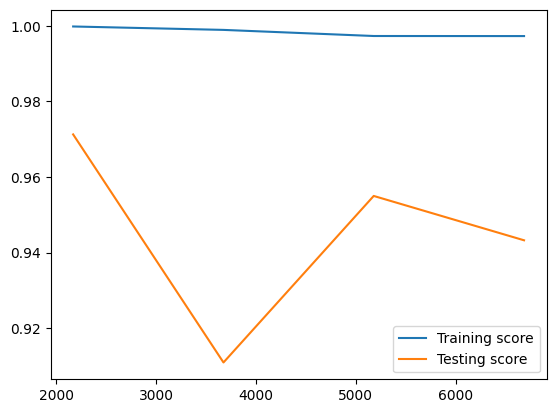

In [26]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

confusion matrix of Gradient Boosting model

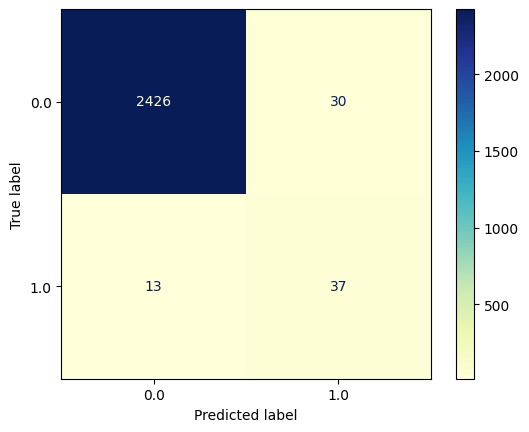

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

### Gaussian Naive Bayes Model

In [30]:
from sklearn.naive_bayes import GaussianNB

start = time.time()
model = GaussianNB().fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Gaussian Naive Bayes", y_test, y_predictions)

Model evaluation:

- 0: No failure
- 1: Machine failure

In [31]:
print("Gaussian Naive Bayes\n" + classification_report(y_test, y_predictions))

Gaussian Naive Bayes
              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88      2456
         1.0       0.07      0.74      0.12        50

    accuracy                           0.79      2506
   macro avg       0.53      0.77      0.50      2506
weighted avg       0.97      0.79      0.87      2506



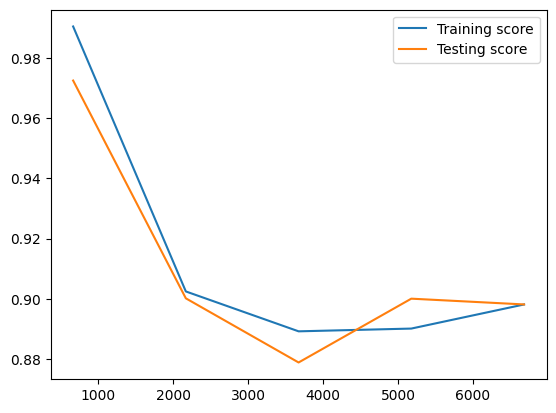

In [32]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

confusion matrix of Gaussian Naive Bayes model

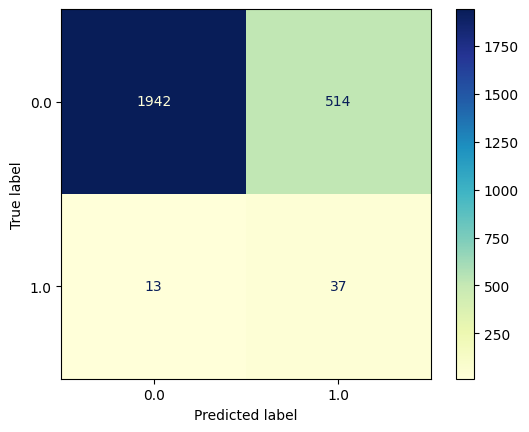

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

### MLP (Multi-layer Perceptron) Model

In [34]:
from sklearn.neural_network import MLPClassifier

start = time.time()
model = MLPClassifier(random_state=1, max_iter=600, learning_rate="invscaling").fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Multi-layer Perceptron", y_test, y_predictions)

Model evaluation:

- 0: No failure
- 1: Machine failure

In [35]:
print("Multi-layer Perceptron\n" + classification_report(y_test, y_predictions))

Multi-layer Perceptron
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2456
         1.0       0.44      0.70      0.54        50

    accuracy                           0.98      2506
   macro avg       0.72      0.84      0.77      2506
weighted avg       0.98      0.98      0.98      2506



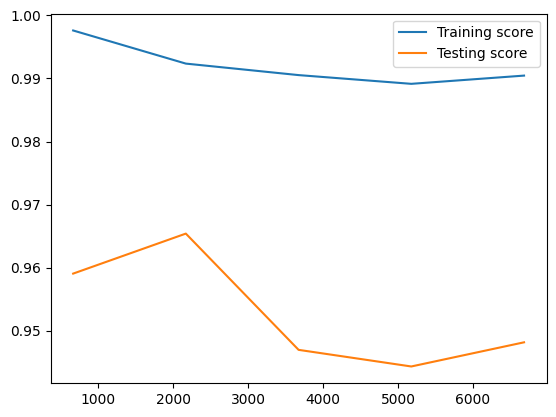

In [36]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

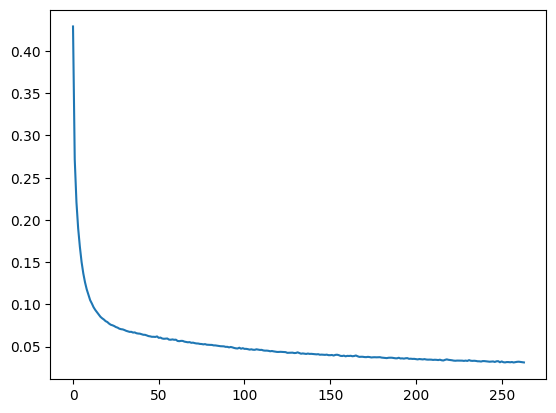

In [37]:
plt.plot(model.loss_curve_)

Confusion matrix of Multi-layer Perceptron model

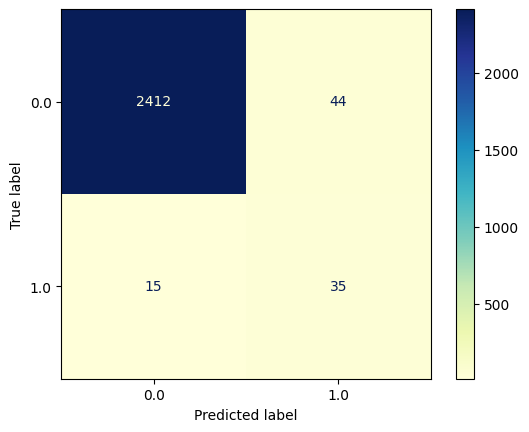

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

### Evaluation

In [39]:
model_performance

,Accuracy,Precision,Recall,F1-Score,Training time,Prediction time
Decision Tree,0.982841,0.985477,0.982841,0.983934,0.087802,0.001749
k-NN,0.977654,0.978523,0.977654,0.978074,0.020576,0.150788
Random Forest,0.989625,0.989253,0.989625,0.989413,0.555166,0.051121
Gradient Boosting,0.982841,0.985843,0.982841,0.984058,3.942431,0.003245
Gaussian Naive Bayes,0.789705,0.974871,0.789705,0.865414,0.005563,0.001657
Multi-layer Perceptron,0.976457,0.982830,0.976457,0.979033,7.959376,0.004791


In [42]:
df.describe()

,Type,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,Power,temperature_differential,power_speed_ratio,thermal_stress,operational_stress,efficiency_index,power_wear_interaction,speed_torque_efficiency
count,8353.000000,8.353000e+03,8.353000e+03,8.353000e+03,8.353000e+03,8353.000000,8.353000e+03,8.353000e+03,8.353000e+03,8.353000e+03,8.353000e+03,8.353000e+03,8.353000e+03,8.353000e+03
mean,0.501736,3.062318e-17,-1.148369e-17,3.593970e-17,9.569742e-18,0.019753,2.381803e-17,-5.018798e-17,2.126609e-18,-1.786352e-17,3.317511e-17,-2.323321e-17,-4.306384e-17,1.999013e-17
std,0.672765,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,0.139160,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00
min,0.000000,-2.918856e+00,-2.155044e+00,-1.978265e+00,-1.739094e+00,0.000000,-2.159318e+00,-2.409576e+00,-1.978350e+00,-2.623263e+00,-1.642949e+00,-2.779986e+00,-1.691759e+00,-1.699169e+00
25%,0.000000,-8.164902e-01,-7.528073e-01,-7.772153e-01,-8.628516e-01,0.000000,-7.708699e-01,-7.059628e-01,-7.773524e-01,-7.304229e-01,-8.353283e-01,-7.107120e-01,-8.423770e-01,-7.871557e-01
50%,0.000000,6.514709e-02,-1.085362e-01,-2.149853e-02,-2.836225e-03,0.000000,-5.713262e-02,-2.049001e-01,-2.161227e-02,-5.852691e-02,-5.720338e-02,6.865408e-02,-3.307273e-02,-1.861959e-01
75%,1.000000,6.755113e-01,6.778534e-01,7.477132e-01,8.571791e-01,0.000000,7.328930e-01,9.976506e-01,7.477495e-01,6.767309e-01,7.340390e-01,7.814212e-01,7.916109e-01,6.438913e-01
max,2.000000,2.574422e+00,2.790683e+00,2.610015e+00,2.285129e+00,1.000000,3.061920e+00,2.099989e+00,2.610081e+00,3.000045e+00,2.698503e+00,2.285950e+00,2.710698e+00,2.807011e+00


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8353 entries, 0 to 8352
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type                      8353 non-null   float64
 1   Process temperature       8353 non-null   float64
 2   Rotational speed          8353 non-null   float64
 3   Torque                    8353 non-null   float64
 4   Tool wear                 8353 non-null   float64
 5   Machine failure           8353 non-null   float64
 6   Power                     8353 non-null   float64
 7   temperature_differential  8353 non-null   float64
 8   power_speed_ratio         8353 non-null   float64
 9   thermal_stress            8353 non-null   float64
 10  operational_stress        8353 non-null   float64
 11  efficiency_index          8353 non-null   float64
 12  power_wear_interaction    8353 non-null   float64
 13  speed_torque_efficiency   8353 non-null   float64
dtypes: float